### Let's import the fire.csv

In [1]:
import numpy as np
import pandas as pd

fire = pd.read_csv('./ICC/SDA2021/SpatialAnalysis2021-main/SpatialAnalysis2021-main/Data/non-spatial/fire/fire.csv')
fire

LATITUDE  LONGITUDE  BRIGHTNESS  SCAN  TRACK    ACQ_DATE  ACQ_TIME  \
0       12.6727     6.4156       304.7   2.2    1.4  2019-01-01       142   
1       12.6738     6.4084       304.4   2.2    1.4  2019-01-01       142   
2       10.8828     6.8020       302.0   2.5    1.5  2019-01-01       143   
3       10.8789     6.8250       304.4   2.5    1.5  2019-01-01       143   
4       10.5560     4.0636       303.5   1.6    1.2  2019-01-01       143   
...         ...        ...         ...   ...    ...         ...       ...   
21455   11.0958     5.5255       306.3   1.1    1.1  2019-01-31      2210   
21456   11.0944     5.5154       305.9   1.1    1.1  2019-01-31      2210   
21457   11.4788     6.7811       343.6   1.3    1.1  2019-01-31      2210   
21458   11.4804     6.7929       323.9   1.3    1.1  2019-01-31      2210   
21459   11.4874     6.7678       305.3   1.3    1.1  2019-01-31      2210   

      SATELLITE INSTRUMENT  CONFIDENCE  VERSION  BRIGHT_T31   FRP DAYNIGHT  \
0          Aqua      MODIS          56     6.03       288.0  22.4        N   
1          Aqua      MODIS          60     6.03       288.0  22.1        N   
2          Aqua      MODIS          46     6.03       288.4  22.2        N   
3          Aqua      MODIS          60     6.03       288.8  27.5        N   
4          Aqua      MODIS          56     6.03       290.9  11.8        N   
...         ...        ...         ...      ...         ...   ...      ...   
21455     Terra      MODIS          67     6.03       295.2   6.9        N   
21456     Terra      MODIS          66     6.03       295.0   6.5        N   
21457     Terra      MODIS         100     6.03       295.2  71.5        N   
21458     Terra      MODIS         100     6.03       293.7  29.4        N   
21459     Terra      MODIS          19     6.03       292.7   7.2        N   

       TYPE  
0         0  
1         0  
2         0  
3         0  
4         0  
...     ...  
21455     0  
21456     0  
21457     0  
21458     0  
21459     0  

[21460 rows x 15 columns]

### 1.1 How many fires were detected in total ?

In [2]:
nbr_fire = fire.shape[0]
fire.count()

LATITUDE      21460
LONGITUDE     21460
BRIGHTNESS    21460
SCAN          21460
TRACK         21460
ACQ_DATE      21460
ACQ_TIME      21460
SATELLITE     21460
INSTRUMENT    21460
CONFIDENCE    21460
VERSION       21460
BRIGHT_T31    21460
FRP           21460
DAYNIGHT      21460
TYPE          21460
dtype: int64

In [3]:
print('number of fires detected: {0}'.format(nbr_fire))

number of fires detected: 21460


### 1.2 During which time period were the fires detected ?

In [4]:
print('The fires were detected between : {0} and {1}'.format(fire.ACQ_DATE.min(),fire.ACQ_DATE.max()))

The fires were detected between : 2019-01-01 and 2019-01-31


So that means that it concerns the month of January 2019

### 1.3 Identify the ten brightest fires during this period. Where are they located?

In [5]:
# only extract the location (latitude + longitude) and the brightness
my_columns = ['LATITUDE', 'LONGITUDE', 'BRIGHTNESS']

# sorting this new object in descending order to have the 10 brightest
fire[my_columns].sort_values('BRIGHTNESS', ascending=False).head(10)

LATITUDE  LONGITUDE  BRIGHTNESS
11427    9.6760    10.6130       422.9
3495    10.5655     6.7566       421.8
21228    8.1329    11.1870       419.7
3319     7.6403     8.1262       418.0
17854   12.4460     5.7779       413.4
3346     7.6324     8.3984       405.4
8828     8.6089    10.5270       399.9
11430    9.6863    10.6208       397.0
21012   11.3494    13.5145       396.7
10353   10.0935     3.8743       395.2

Where are they located ?

In [6]:
pip install geopatra

Note: you may need to restart the kernel to use updated packages.


In [7]:
import geopandas as gpd
import geopatra

bright = fire.sort_values('BRIGHTNESS', ascending=False).iloc[0:10,:]

gdf = gpd.GeoDataFrame(bright, geometry=gpd.points_from_xy(bright.LONGITUDE, bright.LATITUDE))

m = gdf.folium.plot()
m

/home/david/anaconda3/lib/python3.8/site-packages/geopandas/_compat.py:84: UserWarning: The Shapely GEOS version (3.8.0-CAPI-1.13.1 ) is incompatible with the GEOS version PyGEOS was compiled with (3.9.0-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(


### 1.4 Extract all fires detected with a confidence higher than 70 percent. How much are these? Show in a plot.

In [8]:
# Extraction of all fires detected with a confidence higher than 70%
fire_high_conf = fire.loc[fire['CONFIDENCE'] > 70]

In [9]:
# Let's print the extracted dataframe
print('Here are the fires with a confidence higher than 70% \n')
print(fire_high_conf)

Here are the fires with a confidence higher than 70% 

       LATITUDE  LONGITUDE  BRIGHTNESS  SCAN  TRACK    ACQ_DATE  ACQ_TIME  \
5        5.5644     5.7226       307.7   2.6    1.5  2019-01-01       144   
7       12.2363    14.4138       331.5   1.2    1.1  2019-01-01       929   
8       12.2348    14.4245       326.7   1.2    1.1  2019-01-01       929   
10      12.2743    14.3043       324.3   1.2    1.1  2019-01-01       929   
11      12.2660    14.2921       367.3   1.2    1.1  2019-01-01       929   
...         ...        ...         ...   ...    ...         ...       ...   
21450   11.4083     5.7974       307.7   1.2    1.1  2019-01-31      2210   
21452   10.8918     5.7326       309.5   1.1    1.1  2019-01-31      2210   
21454   10.9928     4.8431       308.2   1.0    1.0  2019-01-31      2210   
21457   11.4788     6.7811       343.6   1.3    1.1  2019-01-31      2210   
21458   11.4804     6.7929       323.9   1.3    1.1  2019-01-31      2210   

      SATELLITE INST

In [10]:
# Number of these fires 
print ('There are {0} fires which confidence are strictly higher than 70%'.format(fire_high_conf.CONFIDENCE.count()))

There are 7285 fires which confidence are strictly higher than 70%


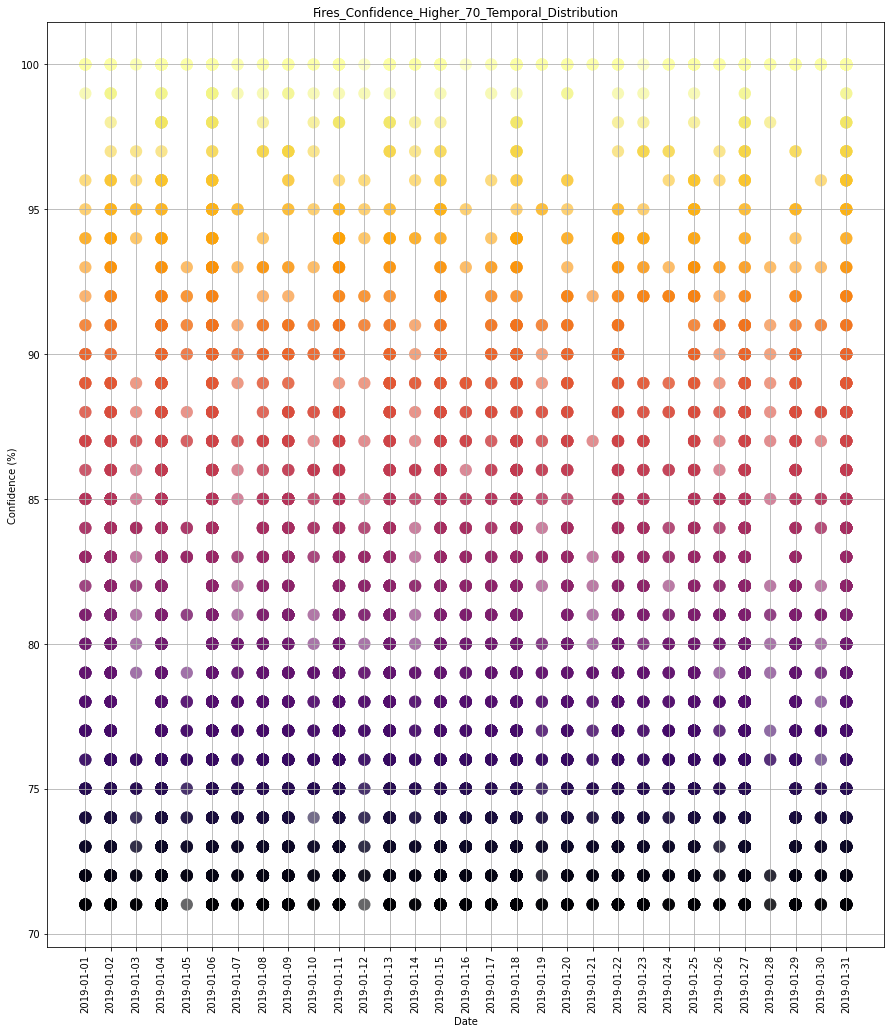

In [11]:
# Let's show them in a plot
import matplotlib.pyplot as plt

# This first plot shows the temporal (per day) distribution of the fires of confidence higher than 70%
plt.figure(figsize=(15, 17))
plt.scatter(fire_high_conf['ACQ_DATE'], fire_high_conf['CONFIDENCE'], c=fire_high_conf['CONFIDENCE'], s=150, alpha=0.6, edgecolors='none', cmap='inferno')
plt.grid(True)
plt.xticks(rotation='vertical')
plt.title("Fires_Confidence_Higher_70_Temporal_Distribution")
plt.xlabel("Date")
plt.ylabel("Confidence (%)")
plt.savefig('Fires_Confidence_Higher_70_Temporal_Distribution.png', dpi=300)

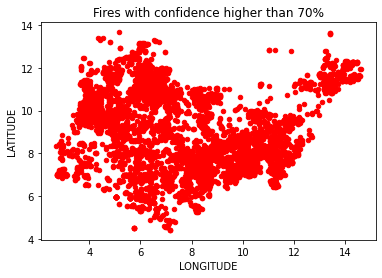

In [12]:
# This second plot shows the spatial distribution of the fires of confidence higher than 70%
fire_high_conf.plot.scatter(x='LONGITUDE',y='LATITUDE',
title = 'Fires with confidence higher than 70%',
color = 'Red')

plt.savefig('Fires_Confidence_Higher_70_Spatial_Distribution.png', dpi=300)

### Create a histogram showing the distribution of the fire radiative power

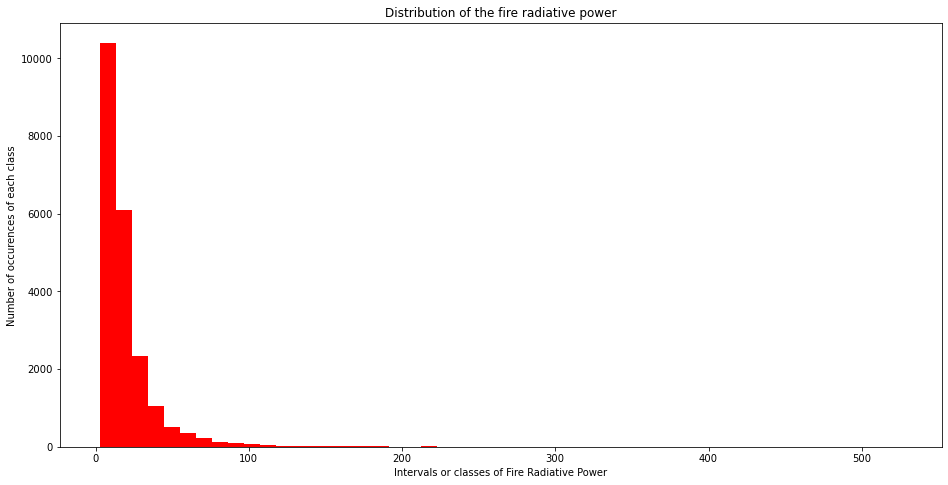

In [13]:
plt.figure(figsize=[15.8,7.8])
plt.xlabel("Intervals or classes of Fire Radiative Power")
plt.ylabel("Number of occurences of each class")
plt.title("Distribution of the fire radiative power")
plt.hist(fire.FRP,bins=50,color='red')
plt.loglog
plt.savefig('Fire_Radiative_Power_Distribution.png', dpi=300)

### 1.6 Create a plot showing the numbers of fires for each day. Convert the dataset into a spatial geopandas dataframe.

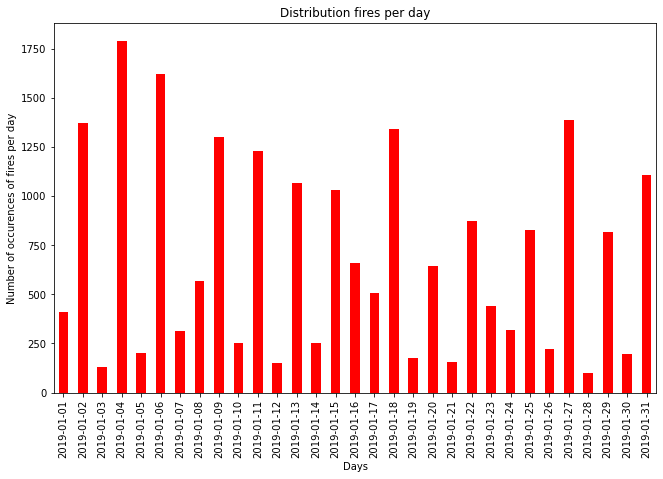

In [14]:
# Let's create a plot showing the numbers of fires for each day

# Let's create a series gathering each frequency for each date
fire_day = fire.groupby(['ACQ_DATE'])['CONFIDENCE'].count()

fire_day.index.set_names('Days', inplace=True)



plt.figure(figsize=[10.8,6.8])
plt.xticks(rotation='vertical')

plt.xlabel("Days")
plt.ylabel("Number of occurences of fires per day")
plt.title("Distribution fires per day")
fire_day.plot.bar(color='red')



plt.savefig('Fire_Distribution_DAILY.png', dpi=300)

/home/david/anaconda3/lib/python3.8/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


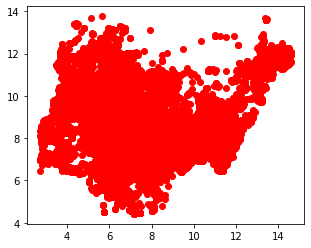

In [15]:
# Let's Convert the dataset into a spatial geopandas dataframe
import geopandas as gpd
from shapely.geometry import Point

geometry = [Point(xy) for xy in zip(fire.LONGITUDE,fire.LATITUDE)]
crs = {'init': 'epsg:26392'}
gdf = gpd.GeoDataFrame(fire, crs=crs, geometry=geometry)

gdf_fire = gdf.copy()

gdf_fire.plot(color='red')

plt.savefig('ConversionInGeoDataFrame.png', dpi=300)

### 1.7 Create a heat map showing the density of fires in Nigeria.


In [16]:
import plotly.express as px
fig = px.density_mapbox(gdf_fire, lat=gdf_fire.LATITUDE, lon=gdf_fire.LONGITUDE, z=gdf_fire.BRIGHTNESS, radius=10,
                        center=dict(lat=0, lon=180), zoom=0,
                        mapbox_style="stamen-terrain")
fig.show()

### 1.8 Investigate if the fires detected in Nigeria are distributed rather regular or if the fires appear rather clustered

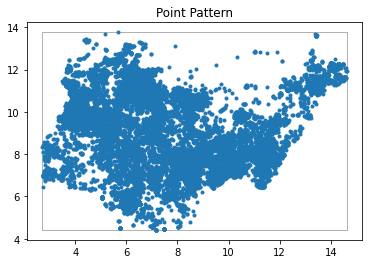

In [17]:
from pointpats import PointPattern
from pointpats import Window
from shapely.geometry import Point

pp = PointPattern(gdf_fire[['LONGITUDE','LATITUDE']])

x,y = gdf_fire.geometry[0].coords.xy
window = Window(list(zip(x,y)))

pp.plot(window=True)

plt.savefig('Fire_point_pattern.png', dpi=300)

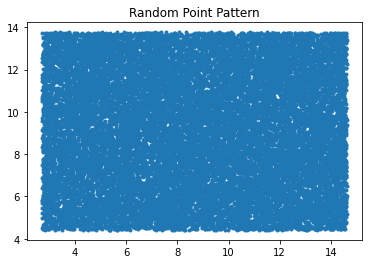

In [20]:
# N-conditioned CSR

from pointpats import PoissonPointProcess

np.random.seed(5)
samples = PoissonPointProcess(pp.window, pp.n, 1, conditioning=False, asPP=False)
samples.realizations[0]
pp_csr = PointPattern(samples.realizations[0], window=window)
pp_csr.plot(window= True,title='Random Point Pattern')

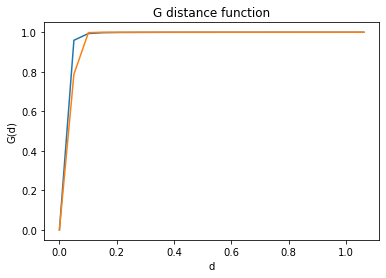

In [18]:
from pointpats._deprecated_distance_statistics import  K,L,G,F, Genv, Fenv, Jenv, Kenv, Lenv

gp1 = G(pp, intervals=20)
gp1.plot()

In [20]:
from pointpats import PoissonPointProcess

realizations = PoissonPointProcess(pp.window, pp.n, 100, asPP=True) # simulate CSR 100 times

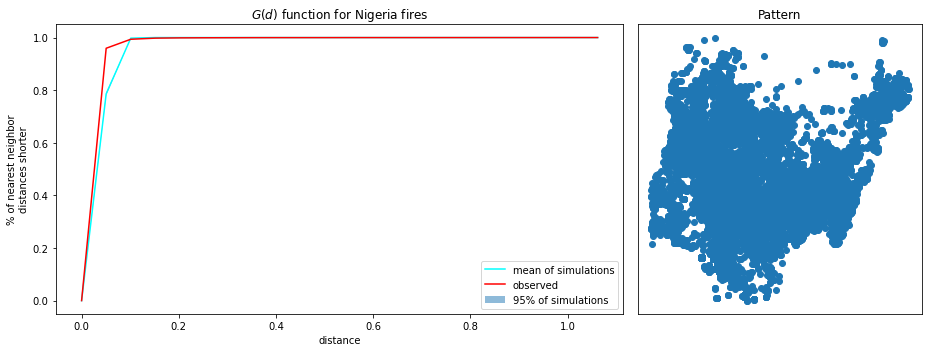

In [23]:
genv = Genv(pp, intervals=20, realizations=realizations)

coordinates=pp.df[['x','y']].values

f,ax = plt.subplots(1,2,figsize=(13,5), 
                    gridspec_kw=dict(width_ratios=(6,3)))

ax[0].fill_between(genv.d, genv.low, genv.high, alpha=.5, 
                 label='95% of simulations')

ax[0].plot(genv.d, genv.mean, color='cyan', 
         label='mean of simulations')

ax[0].plot(*genv.observed.T,
         label = 'observed', color='red')

ax[0].set_xlabel('distance')
ax[0].set_ylabel('% of nearest neighbor\ndistances shorter')
ax[0].legend()
ax[0].set_title(r"$G(d)$ function for Nigeria fires")
ax[1].scatter(*coordinates.T)
ax[1].set_xticks([])
ax[1].set_yticks([])
ax[1].set_xticklabels([])
ax[1].set_yticklabels([])
ax[1].set_title('Pattern')
f.tight_layout()
plt.show()

Looking at the trend of the G- function, we can say that they are distributed in clusters. Now let's identify the clusters.

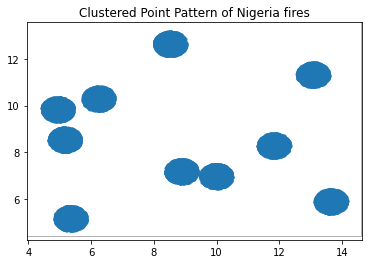

In [25]:
from pointpats import PoissonClusterPointProcess

np.random.seed(5)

csamples = PoissonClusterPointProcess(pp.window, pp.n, 10, 0.5, 1, asPP=True, conditioning=False)

pp_pcp = csamples.realizations[0]
pp_pcp.plot(window=True,  title='Clustered Point Pattern of Nigeria fires') 

In [27]:
# Let's import the local area government dataset (nigeria_lga.shp).
win = gpd.read_file('./ICC/SDA2021/SpatialAnalysis2021-main/SpatialAnalysis2021-main/Data/vector/fires/new_lga_nigeria_2003.shp')

### 1.9 Count the fires occurring in the different local government areas in Nigeria. How much are they?

In [28]:
#Let's create the corresponding point pattern
from pointpats import Window
win.geometry
x,y = win.geometry[0].exterior.coords.xy
window = Window(list(zip(x,y)))

pp= PointPattern(gdf, window=window)
pp.summary()

Point Pattern
21460 points
Bounding rectangle [(4.4173,2.7047), (13.7626,14.6151)]
Area of window: 0.09938352072958878
Intensity estimate for window: 215931.17090699787
         x       y  mark_0  mark_1  mark_2      mark_3  mark_4 mark_5 mark_6  \
0  12.6727  6.4156   304.7     2.2     1.4  2019-01-01     142   Aqua  MODIS   
1  12.6738  6.4084   304.4     2.2     1.4  2019-01-01     142   Aqua  MODIS   
2  10.8828  6.8020   302.0     2.5     1.5  2019-01-01     143   Aqua  MODIS   
3  10.8789  6.8250   304.4     2.5     1.5  2019-01-01     143   Aqua  MODIS   
4  10.5560  4.0636   303.5     1.6     1.2  2019-01-01     143   Aqua  MODIS   

   mark_7  mark_8  mark_9  mark_10 mark_11  mark_12                   mark_13  
0      56    6.03   288.0     22.4       N        0  POINT (6.41560 12.67270)  
1      60    6.03   288.0     22.1       N        0  POINT (6.40840 12.67380)  
2      46    6.03   288.4     22.2       N        0  POINT (6.80200 10.88280)  
3      60    6.03   288.8     

<ipython-input-29-a625b4b88e6a>:6: UserWarning:

CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:4326
Right CRS: EPSG:26392




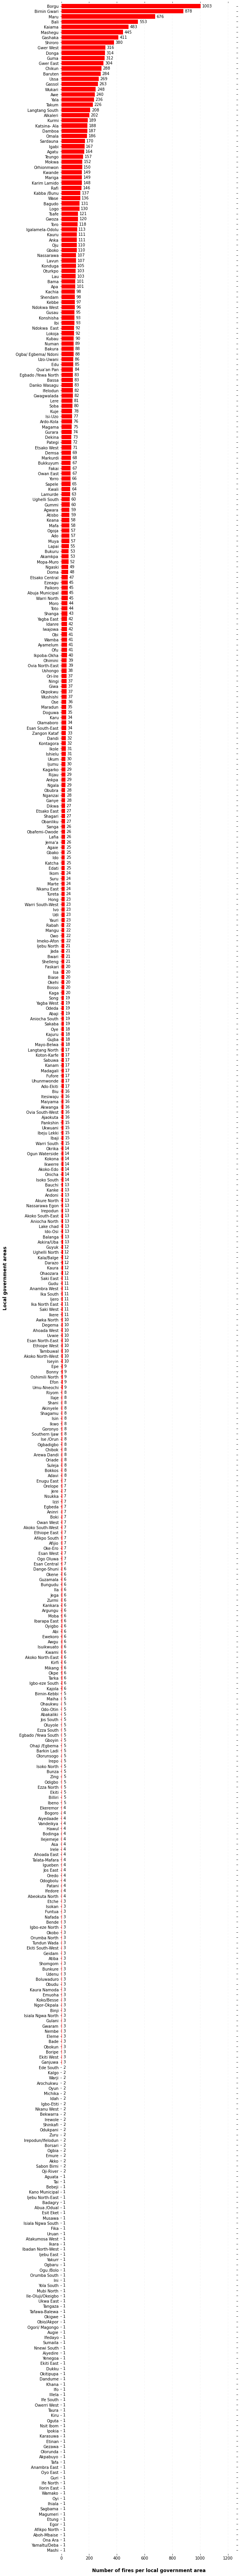

In [29]:
import seaborn as sns

lga = gpd.read_file('./ICC/SDA2021/SpatialAnalysis2021-main/SpatialAnalysis2021-main/Data/vector/fires/new_lga_nigeria_2003.shp')


dfsjoin = gpd.sjoin(lga.to_crs('EPSG:4326'),gdf_fire)
dfsjoin
y = dfsjoin['LGA'].value_counts(ascending=True)



ax = y.plot(kind='barh', figsize=(8, 120), color='red', zorder=2, width=0.85)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# Switch off ticks
ax.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

# Draw vertical axis lines
vals = ax.get_xticks()
for tick in vals:
    ax.axvline(x=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

# Set x-axis label
ax.set_xlabel("Number of fires per local government area", labelpad=20, weight='bold', size=12)

# Set y-axis label
ax.set_ylabel("Local government areas", labelpad=20, weight='bold', size=12)
for i, v in enumerate(y):
    ax.text(v + 10, i, str(v), color='black', fontsize=10, ha='left', va='center')

### 1.10 Create a map displaying the number of fires for each local government area.

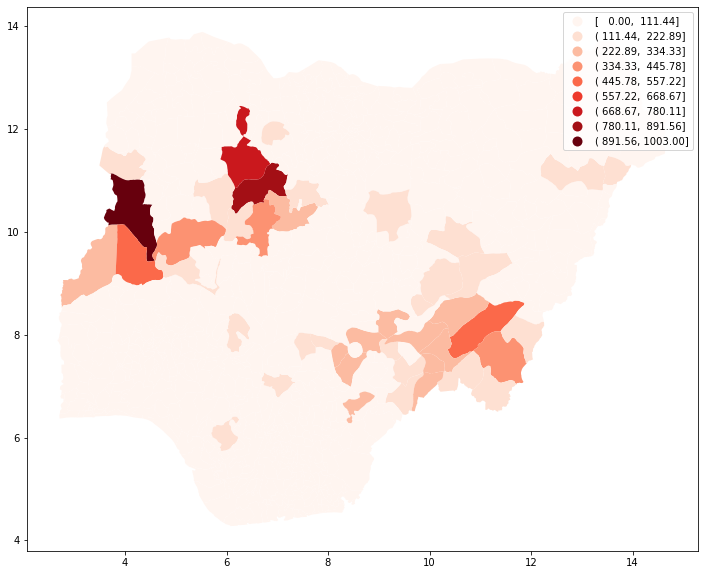

In [30]:
lga_index = lga.set_index('LGA')
lga_index

lga_count  = dfsjoin.groupby(by='LGA')[["LGA"]].count()
lga_count.rename(columns={'LGA':'nfires'},inplace=True)

lga_count

lga_merge = lga_index.merge(lga_count,how='left', left_index=True, right_index=True)
lga_merge = lga_merge.fillna(0.0)

lga_merge.to_file('./ICC/SDA2021/SpatialAnalysis2021-main/SpatialAnalysis2021-main/Data/vector/fires/fires_by_lga.shp')

cmap = 'Reds'
figsize = (16, 10)
colors = 9

lga_merge.plot(column='nfires', cmap=cmap, figsize=figsize, scheme='equal_interval', k=colors, legend=True)

plt.savefig('nFire_by_LGA.png', dpi=300)

In [31]:
# The second plot starts here
fon = gpd.sjoin(gdf_fire,lga, op = 'within')
fon = fon.groupby('LGA').size()

fire = fon.to_frame().reset_index()

fire.columns = ['LGA', 'NBf']

nbf_la = lga.merge(fire, on = 'LGA')
nbf_la['coordinates'] = nbf_la['geometry'].apply(lambda
x:x.representative_point().coords[:])
nbf_la['coordinates'] = [crdn[0] for crdn in nbf_la['coordinates']]

<ipython-input-31-35bc93d19db5>:1: UserWarning:

CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:26392
Right CRS: EPSG:4326




<ipython-input-32-e8c31fa273fb>:3: MatplotlibDeprecationWarning:

The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.



Text(0.5, 1.0, 'Number of fires per location')

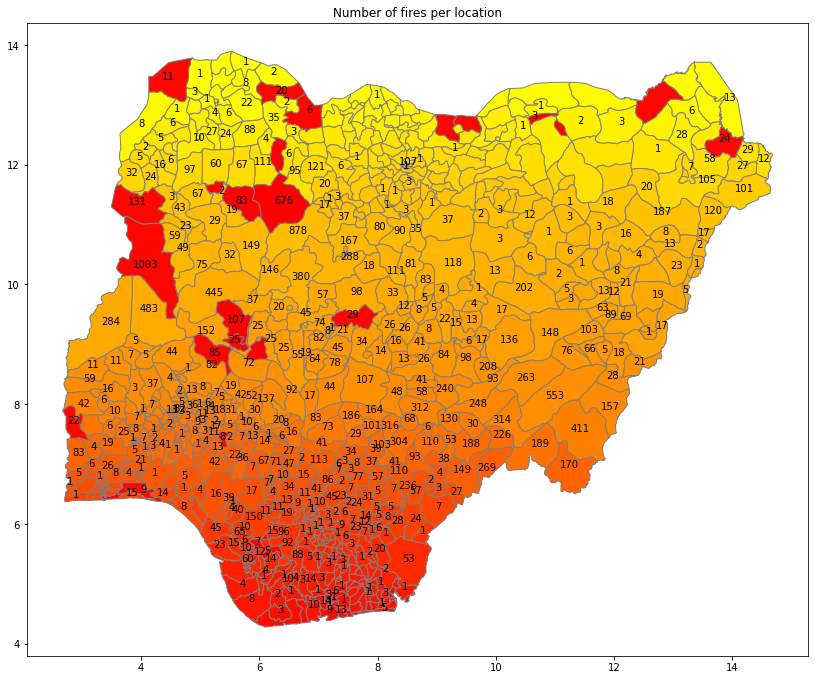

In [32]:
ax = nbf_la.plot(figsize = (14, 14))
for i, r in nbf_la.iterrows():
    plt.annotate(s = r['NBf'], xy = r['coordinates'], horizontalalignment = 'center')
lga.plot(ax = ax, edgecolor = 'gray' , cmap= 'autumn_r')
plt.title('Number of fires per location')

### 1.11 Investigate the spatial correlation between the numbers of fires in the different local government areas.

If there were spatial autocorrelation, regions of a similar PfPR would be spatially clustered.

<AxesSubplot:>

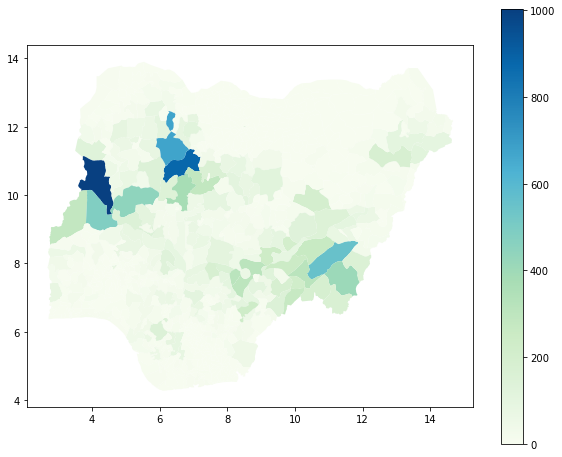

In [47]:
# Here we used the lga_merge final dataframe to plot the different region of equal numbers of fires 
# in order to investigate the spatial correlation 

fig, ax = plt.subplots(figsize=(10,8), subplot_kw={'aspect':'equal'})
lga_merge.plot(column='nfires',  k=5, cmap='GnBu', legend=True, ax=ax)

/home/david/anaconda3/lib/python3.8/site-packages/splot/_viz_libpysal_mpl.py:115: UserWarning:

Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.


/home/david/anaconda3/lib/python3.8/site-packages/splot/_viz_libpysal_mpl.py:154: UserWarning:

Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.




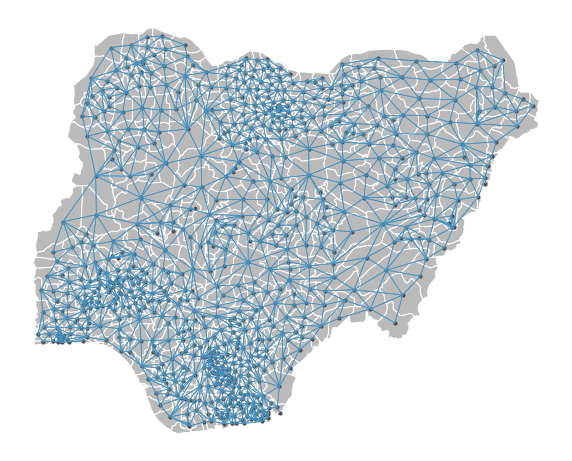

In [51]:
import libpysal as lps
gdf1 = lga_merge

#Let's use determine the contiguity weighst by using the queen criterion
wq =  lps.weights.Queen.from_dataframe(gdf1)

from splot.libpysal import plot_spatial_weights
plot_spatial_weights(wq, gdf1)
plt.show()

<ipython-input-55-6ad69296a449>:5: UserWarning:

Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.


/home/david/anaconda3/lib/python3.8/site-packages/splot/_viz_libpysal_mpl.py:115: UserWarning:

Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.


/home/david/anaconda3/lib/python3.8/site-packages/splot/_viz_libpysal_mpl.py:154: UserWarning:

Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.




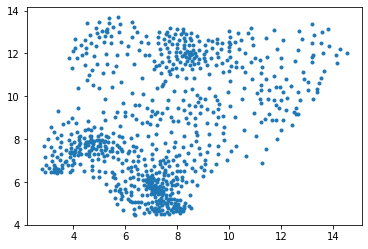

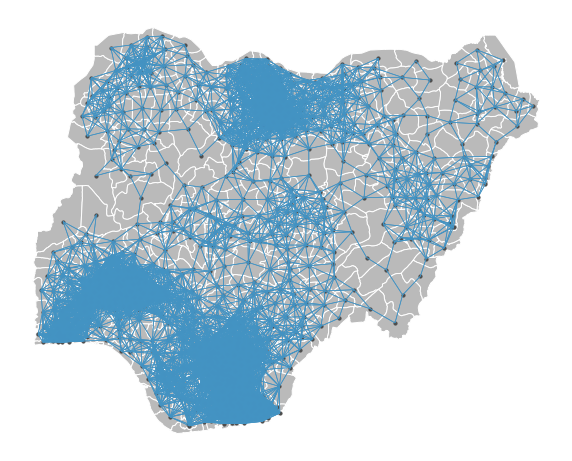

In [55]:
# Now let's use the kernel weight to build our weight matrix

def getXY(pt):
    return (pt.x, pt.y)
centroidseries = gdf1['geometry'].centroid
x,y = [list(t) for t in zip(*map(getXY, centroidseries))]
plt.plot(x,y,'.')

data=np.column_stack((x, y))
kd = lps.cg.KDTree(data)
kw=lps.weights.Kernel(data)
plot_spatial_weights(kw, gdf1)
plt.show()

Now that we have the weight matrix, let's start computing the spatial lag to check the similarity

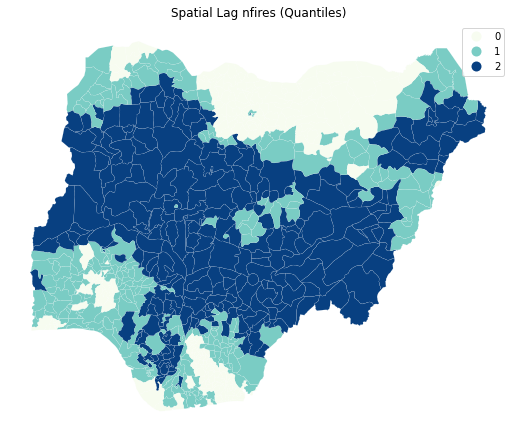

In [57]:
import mapclassify as mc
df1 = gdf1
wq.transform = 'r'

y = df1['nfires']
ylag = lps.weights.lag_spatial(wq, y)
ylagq5 = mc.Quantiles(ylag, k=3)

f, ax = plt.subplots(1, figsize=(9, 9))
df1.assign(cl=ylagq5.yb).plot(column='cl', categorical=True, \
        k=5, cmap='GnBu', linewidth=0.1, ax=ax, \
        edgecolor='white', legend=True)
ax.set_axis_off()
plt.title("Spatial Lag nfires (Quantiles)")

plt.show()

In [33]:
import geopandas as gpd
import mapclassify as mc
import libpysal as lps
from esda.moran import Moran
from splot.esda import moran_scatterplot
from splot.esda import plot_moran
from esda.moran import Moran_Local

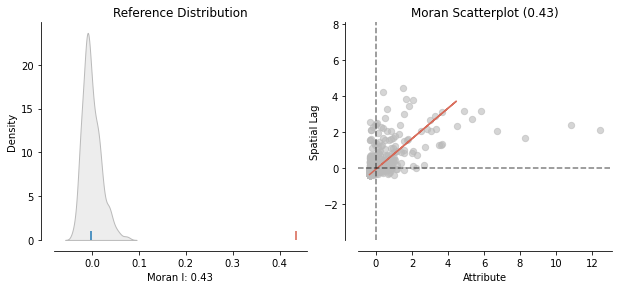

<Figure size 432x288 with 0 Axes>

In [34]:
#defining and transforming the queen weights in rows standards
wq = lps.weights.Queen.from_dataframe(lga_merge)
wq.transform = 'r'
y = lga_merge['nfires']

#calculating the moran's I
moran = Moran(y,wq)
moran.I

#plotting
plot_moran(moran, zstandard=True, figsize=(10,4))
plt.show()

plt.savefig('Spatial (auto)correlation.png', dpi=300)

In [35]:
moran.p_sim

0.001

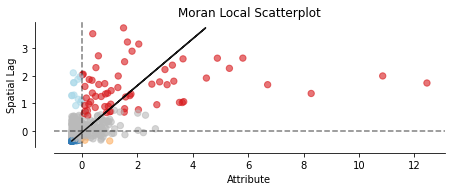

<Figure size 432x288 with 0 Axes>

In [36]:
moran_loc = Moran_Local(y, wq)
fig, ax = moran_scatterplot(moran_loc, p=0.05)
ax.set_ylabel('Spatial Lag')
plt.show()

plt.savefig('moran loc .png', dpi=300)

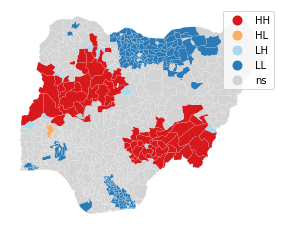

In [37]:
from splot.esda import lisa_cluster

lisa_cluster(moran_loc, lga_merge, p=0.05)
plt.show() 